# Exploration Exercises

In [196]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from acquire import get_iris_data
import prepare as p
import scipy.stats as stats

1. Acquire, prepare & split your data.

In [2]:
# get data using get iris function from acquire.py
df = get_iris_data()

In [6]:
# clean and split using prep iris function from prepare.py
df_clean = p.prep_iris_explore(df)

In [7]:
# split data stratifying accross species column
train, validate, test = p.train_validate_test_split(df_clean, 'species')

In [10]:
# take a peak at the sizes
train.shape, validate.shape, test.shape

((84, 5), (36, 5), (30, 5))

In [11]:
# take a peak at the train data set
train.head()

,species,sepal_length,sepal_width,petal_length,petal_width
88,versicolor,5.6,3.0,4.1,1.3
146,virginica,6.3,2.5,5.0,1.9
76,versicolor,6.8,2.8,4.8,1.4
122,virginica,7.7,2.8,6.7,2.0
7,setosa,5.0,3.4,1.5,0.2


<hr style="border-top: 10px groove pink; margin-top: 1px; margin-bottom: 1px"></hr>

### 2. Univariate Stats

- For each measurement type (quantitative variable): create a histogram, boxplot, & compute descriptive statistics (using .describe()).

- For each species (categorical variable): create a frequency table and a bar plot of those frequencies.

- Document takeaways & any actions

In [21]:
# use .describe to get descriptive stats. Use .T for ease of reading
train.describe().T

,count,mean,std,min,25%,50%,75%,max
sepal_length,84.0,5.809524,0.787036,4.4,5.175,5.70,6.300,7.9
sepal_width,84.0,3.038095,0.460985,2.0,2.775,3.00,3.400,4.4
petal_length,84.0,3.720238,1.711040,1.3,1.600,4.25,5.025,6.7
petal_width,84.0,1.172619,0.731124,0.2,0.300,1.30,1.800,2.5


In [31]:
# The above didn't seem super helpful to looking at different species
# look at the measurement means broken down by species
means = train.groupby('species').mean()
means

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
setosa,5.067857,3.460714,1.492857,0.257143
versicolor,5.917857,2.760714,4.221429,1.310714
virginica,6.442857,2.892857,5.446429,1.950000


<AxesSubplot:ylabel='species'>

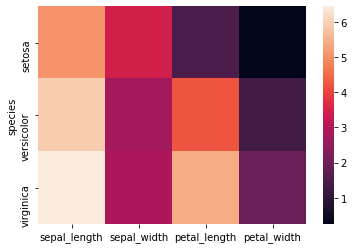

In [32]:
# plot in heatmap form
sns.heatmap(means)

#### Takeaways from means
- Virginica flowers have the longest sepal length (indicated by whitest color)
- Setosa flowers have the shortest average petal_width
- Setosa flowers also have a short petal length

In [33]:
# look at the measurement medians broken down by species
medians = train.groupby('species').median()
medians

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
setosa,5.05,3.40,1.50,0.2
versicolor,5.75,2.80,4.25,1.3
virginica,6.30,2.85,5.50,1.9


<AxesSubplot:ylabel='species'>

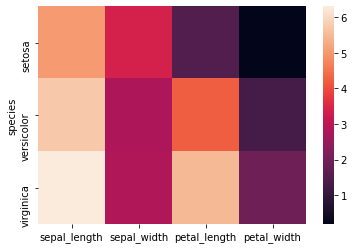

In [38]:
sns.heatmap(medians)

#### Takeaways from medians
- the medians and the means are very similar
- the data set seems to be evenly distributied (at least when grouped by species)

In [91]:
# seperate describe by species! 
train.groupby('species').describe().T

species                setosa  versicolor  virginica
sepal_length count  28.000000   28.000000  28.000000
             mean    5.067857    5.917857   6.442857
             std     0.362147    0.572230   0.668569
             min     4.400000    4.900000   4.900000
             25%     4.875000    5.500000   6.075000
             50%     5.050000    5.750000   6.300000
             75%     5.400000    6.300000   6.725000
             max     5.700000    7.000000   7.900000
sepal_width  count  28.000000   28.000000  28.000000
             mean    3.460714    2.760714   2.892857
             std     0.382331    0.329241   0.334363
             min     2.900000    2.000000   2.200000
             25%     3.100000    2.575000   2.700000
             50%     3.400000    2.800000   2.850000
             75%     3.725000    3.000000   3.000000
             max     4.400000    3.400000   3.800000
petal_length count  28.000000   28.000000  28.000000
             mean    1.492857    4.221429   5.446429
             std     0.121499    0.467743   0.520315
             min     1.300000    3.300000   4.500000
             25%     1.400000    3.900000   5.075000
             50%     1.500000    4.250000   5.500000
             75%     1.600000    4.625000   5.700000
             max     1.700000    5.000000   6.700000
petal_width  count  28.000000   28.000000  28.000000
             mean    0.257143    1.310714   1.950000
             std     0.099735    0.185271   0.288675
             min     0.200000    1.000000   1.400000
             25%     0.200000    1.200000   1.800000
             50%     0.200000    1.300000   1.900000
             75%     0.300000    1.400000   2.125000
             max     0.600000    1.700000   2.500000

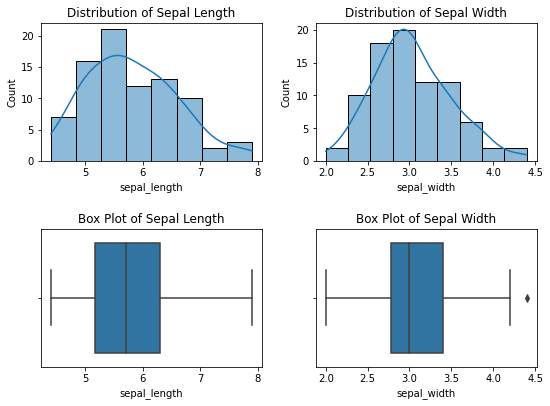

In [130]:
# create histogram and box plot of sepal size
plt.figure(figsize = (8,6))
plt.subplot(221)
sns.histplot(x= train.sepal_length, kde=True)
plt.title('Distribution of Sepal Length')

plt.subplot(222)
sns.histplot(x=train.sepal_width, kde=True)
plt.title('Distribution of Sepal Width')

plt.subplot(223)
sns.boxplot(x=train.sepal_length)
plt.title('Box Plot of Sepal Length')


plt.subplot(224)
sns.boxplot(x=train.sepal_width)
plt.title('Box Plot of Sepal Width')

plt.tight_layout(pad = 2)

plt.show()


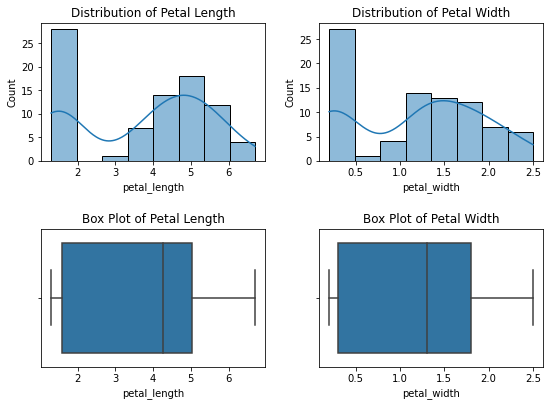

In [129]:
# create histogram of Petal measurements

plt.figure(figsize = (8,6))

plt.subplot(221)
sns.histplot(x=train.petal_length, kde=True)
plt.title('Distribution of Petal Length')

plt.subplot(222)
sns.histplot(x=train.petal_width, kde=True)
plt.title('Distribution of Petal Width')

plt.subplot(223)
sns.boxplot(x=train.petal_length)
plt.title('Box Plot of Petal Length')


plt.subplot(224)
sns.boxplot(x=train.petal_width)
plt.title('Box Plot of Petal Width')

plt.tight_layout(pad = 2)

plt.show()

In [166]:
crosstab = pd.crosstab(train['species'], columns = 'count' )
crosstab

col_0,count
species,
setosa,28
versicolor,28
virginica,28


In [177]:
crosstab.reset_index(inplace=True)

In [178]:
crosstab

col_0,species,count
0,setosa,28
1,versicolor,28
2,virginica,28


<AxesSubplot:xlabel='species', ylabel='count'>

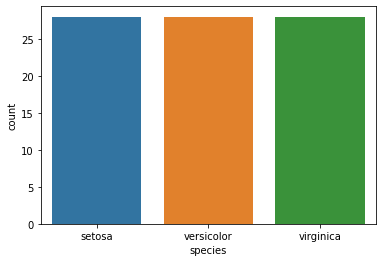

In [179]:
sns.barplot(data = crosstab, x = 'species', y = 'count')

<AxesSubplot:xlabel='species', ylabel='Count'>

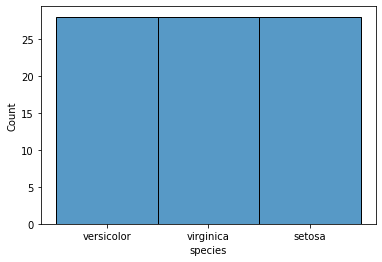

In [161]:
sns.histplot(data = train, x = 'species', multiple = 'stack')

#### Takeaways from crosstabs
- reset your index in a cross tab to be able to put it in a bar graph
- 28 of each flower type. (which is good because that's how the original dataset was distributed)
- Petal length and width varys a lot more than sepal length
- Sepal width has an outlier

<hr style="border-top: 10px groove pink; margin-top: 1px; margin-bottom: 1px"></hr>

### 3. Bivariate Stats

- Visualize each measurement type (y-axis) with the species variable (x-axis) using barplots, adding a horizontal line showing the overall mean of the metric (y-axis).

- For each measurement type, compute the descriptive statistics for each species.

- For virginica & versicolor: Compare the mean petal_width using the Mann-Whitney test (scipy.stats.mannwhitneyu) to see if there is a significant difference between the two groups. Do the same for the other measurement types.

- Document takeaways & any actions.

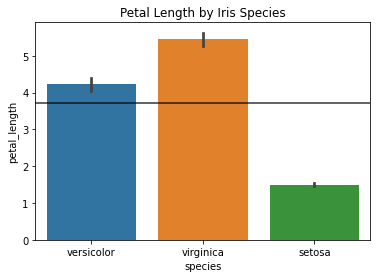

In [191]:
# petal length
sns.barplot(data = train, x = 'species', y = 'petal_length')
plt.axhline(train.petal_length.mean(), c = 'black', alpha = 0.8)
plt.title('Petal Length by Iris Species')
plt.show()

- Setosa's have the shortest petal lengths. Much shorter than the overall average for all the flowers.
- Virginica species has the longest petal lengths

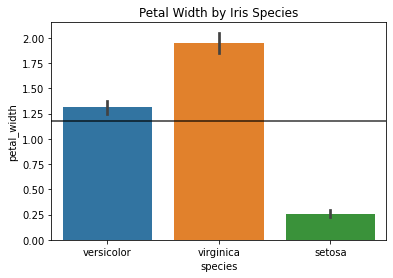

In [192]:
# petal width
sns.barplot(data = train, x = 'species', y = 'petal_width')
plt.axhline(train.petal_width.mean(), c = 'black', alpha = 0.8)
plt.title('Petal Width by Iris Species')
plt.show()

- Viriginica have the widest petal width, and setosa the smallest. 
- Setosa's width is way below the average
- Setosa has the smallest petal size overall (width and length)

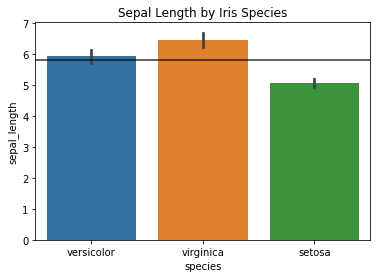

In [193]:
# sepal length
sns.barplot(data = train, x = 'species', y = 'sepal_length')
plt.axhline(train.sepal_length.mean(), c = 'black', alpha = 0.8)
plt.title('Sepal Length by Iris Species')
plt.show()

- Sepal Lengths are generally long. This (I believe) is a charachteristic of Irises. They have long, colorful Sepals 

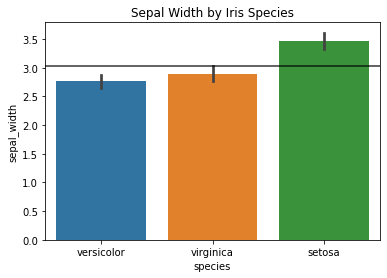

In [194]:
# sepal width
sns.barplot(data = train, x = 'species', y = 'sepal_width')
plt.axhline(train.sepal_width.mean(), c = 'black', alpha = 0.8)
plt.title('Sepal Width by Iris Species')
plt.show()

- Setosa's have the widest Sepals
- If you look at a picture of a Setosa, they have large sepals and little petals

#### Descriptive Stats for each species

In [195]:
# seperate describe by species! 
train.groupby('species').describe().T

species                setosa  versicolor  virginica
sepal_length count  28.000000   28.000000  28.000000
             mean    5.067857    5.917857   6.442857
             std     0.362147    0.572230   0.668569
             min     4.400000    4.900000   4.900000
             25%     4.875000    5.500000   6.075000
             50%     5.050000    5.750000   6.300000
             75%     5.400000    6.300000   6.725000
             max     5.700000    7.000000   7.900000
sepal_width  count  28.000000   28.000000  28.000000
             mean    3.460714    2.760714   2.892857
             std     0.382331    0.329241   0.334363
             min     2.900000    2.000000   2.200000
             25%     3.100000    2.575000   2.700000
             50%     3.400000    2.800000   2.850000
             75%     3.725000    3.000000   3.000000
             max     4.400000    3.400000   3.800000
petal_length count  28.000000   28.000000  28.000000
             mean    1.492857    4.221429   5.446429
             std     0.121499    0.467743   0.520315
             min     1.300000    3.300000   4.500000
             25%     1.400000    3.900000   5.075000
             50%     1.500000    4.250000   5.500000
             75%     1.600000    4.625000   5.700000
             max     1.700000    5.000000   6.700000
petal_width  count  28.000000   28.000000  28.000000
             mean    0.257143    1.310714   1.950000
             std     0.099735    0.185271   0.288675
             min     0.200000    1.000000   1.400000
             25%     0.200000    1.200000   1.800000
             50%     0.200000    1.300000   1.900000
             75%     0.300000    1.400000   2.125000
             max     0.600000    1.700000   2.500000

For virginica & versicolor: Compare the mean petal_width using the Mann-Whitney test (scipy.stats.mannwhitneyu) to see if there is a significant difference between the two groups. Do the same for the other measurement types.

In [205]:
# create dataframe of just the virginica flowers for later comparison
virginica_df = train[train.species == 'virginica']
virginica_df.head()

,species,sepal_length,sepal_width,petal_length,petal_width
146,virginica,6.3,2.5,5.0,1.9
122,virginica,7.7,2.8,6.7,2.0
135,virginica,7.7,3.0,6.1,2.3
120,virginica,6.9,3.2,5.7,2.3
114,virginica,5.8,2.8,5.1,2.4


In [207]:
# create versicolor dataframe 
versicolor_df = train[train.species == 'versicolor']
versicolor_df.head()

,species,sepal_length,sepal_width,petal_length,petal_width
88,versicolor,5.6,3.0,4.1,1.3
76,versicolor,6.8,2.8,4.8,1.4
77,versicolor,6.7,3.0,5.0,1.7
85,versicolor,6.0,3.4,4.5,1.6
56,versicolor,6.3,3.3,4.7,1.6


In [208]:
# need list of values for the man whitney test. Using the specific species dfs petal length for this
stats.mannwhitneyu(x = versicolor_df.petal_length, y = virginica_df.petal_length)

MannwhitneyuResult(statistic=17.5, pvalue=4.2000104799972546e-10)

- P value is very small so the means of the petal lengths for viriginica and versicolor are statisitically different

In [230]:
# create list of columns
cols = list(train.columns)
cols

['species', 'sepal_length', 'sepal_width', 'petal_length', 'petal_width']

In [233]:
# remove the species column
cols.remove('species')

In [244]:
# for loop for printing out the stats comparing the measurments of the Viriginica and Versicolor flowers
for measurement in cols:
    stat, p = stats.mannwhitneyu(x = versicolor_df[measurement], y = virginica_df[measurement])
    print(f'Statistics for the {measurement} are:')
    print(f'Stat is {stat}, P value is {p}.\n')

Statistics for the sepal_length are:
Stat is 205.5, P value is 0.0011272427574888617.

Statistics for the sepal_width are:
Stat is 314.5, P value is 0.10218807894420534.

Statistics for the petal_length are:
Stat is 17.5, P value is 4.2000104799972546e-10.

Statistics for the petal_width are:
Stat is 19.5, P value is 4.466432805226513e-10.



#### Takeaways for statistical comparisons
- Sepal Width p value is above 0.05. The mean sepal width for viriginica and versicolor irises are very similar. close to the same (maybe)

<hr style="border-top: 10px groove pink; margin-top: 1px; margin-bottom: 1px"></hr>

## Multivariate Stats

- Visualize the interaction of each measurement type with the others using a pairplot (or scatter matrix or something similar) and add color to represent species.

- Create a swarmplot using a melted dataframe of all your numeric variables. The x-axis should be the variable name, the y-axis the measure. Add another dimension using color to represent species. Document takeaways from this visualization.

- Ask a specific question of the data, such as: is the sepal area signficantly different in virginica compared to setosa? Answer the question through both a plot and using a mann-whitney or t-test. If you use a t-test, be sure assumptions are met (independence, normality, equal variance).

- Document takeaways and any actions.

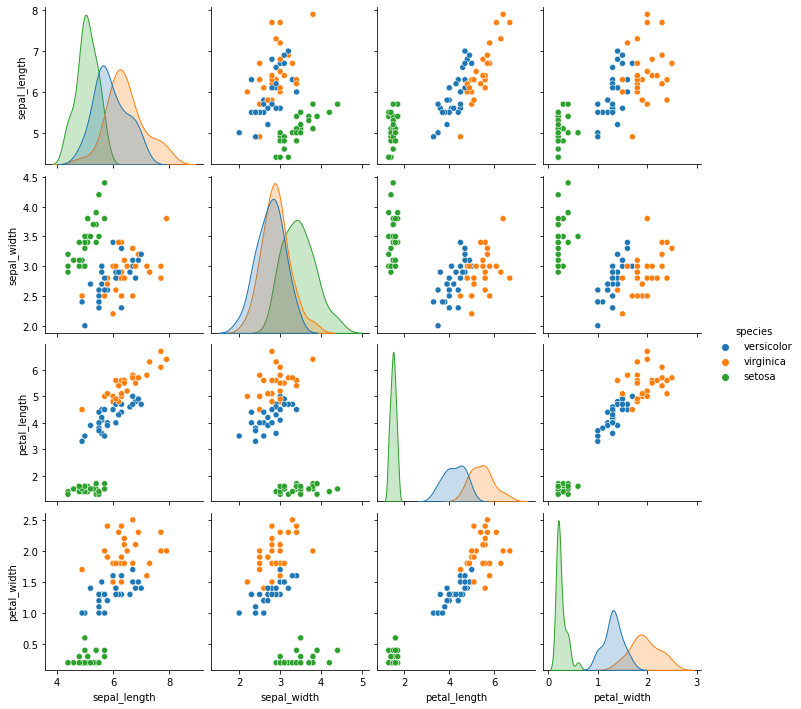

In [82]:
# use pairplot 
# diag_kind='hist' use this kwag to switch to histograms on the diagonal
sns.pairplot(train, hue = 'species')

In [247]:
# melt dataframe 
# new columns species, attribute, measurement

melted = pd.melt(train, id_vars = 'species', var_name = 'attribute', value_name= 'measurement')
melted.head()

,species,attribute,measurement
0,versicolor,sepal_length,5.6
1,virginica,sepal_length,6.3
2,versicolor,sepal_length,6.8
3,virginica,sepal_length,7.7
4,setosa,sepal_length,5.0


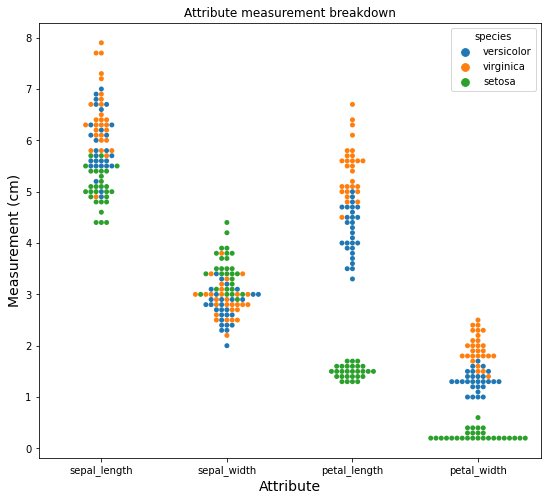

In [270]:
# create swarm plot
plt.figure(figsize = (9,8))
sns.swarmplot(data = melted, x = 'attribute', y = 'measurement', hue = 'species')
plt.title('Attribute measurement breakdown')
plt.xlabel('Attribute', fontsize = 14)
plt.ylabel('Measurement (cm)', fontsize = 14)
plt.show()

#### Takeaways from graph
- Again petal shape (length and width) for setosa's is distinct. Very set apart from the other two species
    - Setosa has very small petals
- there is a wide range of petal lengths accross all the flowers
- Virginica flowers have the largest of all the measurement categories except sepal_width

### Question:
### Are sepal lengths on Setosa flowers shorter than Versicolor flowers?

- compare means of sepal lengths using a Mann Whitney Test

In [272]:
# create dataframe for setosa
setosa_df = train[train.species == 'setosa']
setosa_df.head()

,species,sepal_length,sepal_width,petal_length,petal_width
7,setosa,5.0,3.4,1.5,0.2
3,setosa,4.6,3.1,1.5,0.2
19,setosa,5.1,3.8,1.5,0.3
16,setosa,5.4,3.9,1.3,0.4
20,setosa,5.4,3.4,1.7,0.2


In [273]:
setosa_df.sepal_length.mean()

5.067857142857144

In [284]:
versicolor_df.sepal_length.mean()

5.917857142857143

$H_{0}$ - Sepal lengths of Setosa flowers == Sepal lengths of Versicolor flowers

$H_{a}$ - Sepal lengths of Setosa flowers < Sepal lengths of Versicolor flowers

alpha = 0.025 <--- This is for 1 tailed, sepal length smaller

Check means to see which one is lower, and look for small p value

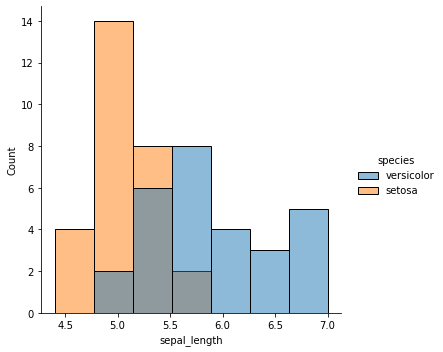

In [283]:
# graph in a histogram
sns.displot(data= train[train.species != 'virginica'], x = 'sepal_length', hue = 'species')

In [276]:
stats.mannwhitneyu(x = setosa_df.sepal_length, y = versicolor_df.sepal_length)

MannwhitneyuResult(statistic=71.0, pvalue=6.99746897291307e-08)

### P value is less than alpha, we can reject null hypothesis!  
### Setosa sepal length < Versicolor sepal length and p value is less than 0.025 (for 1 tailed test), we can assume the $H_{a}$ is true